In [1]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import pandas
import numpy as np
import matplotlib.pyplot as plt
c=Constants()


# set some global options
plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 20


# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

Constants defined...


In [102]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16


In [180]:
DATA='./'
LOGS='LOGS_RS10_MP0.01_RP0.1'
#LOGS='LOGS_RS3_MP0.01_RP0.1'

In [168]:
#h = mr.MesaData(DATA+'history_r5_proper.data')
h = mr.MesaData(DATA+LOGS+'/'+'history.data')

/Users/mcantiello/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


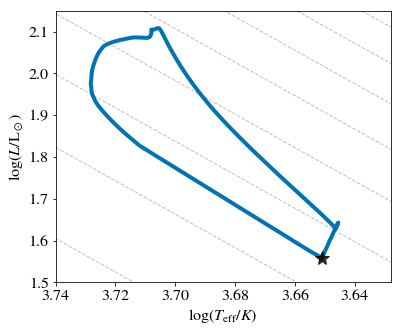

In [169]:
tt=np.arange(1,5,0.01)


logl=h.log_L
logt=h.log_Teff



radii=np.arange(1,100,2)
legend = plt.legend(loc='lower right',prop={'size':12})
#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,1*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)
for radius in radii:
   plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,radius*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)




#plt.plot(tt,np.log10(const_radius_on_hrd(10**tt,100*c.rsun)/c.lsun),linestyle='--',linewidth=1,color='grey',alpha=0.5)

plt.plot(logt,logl,linewidth=4,color=BLUE)
plt.plot(logt[0],logl[0],marker='*',color=BLACK,alpha=0.8,markersize=15)
plt.axis([3.74,3.628, 1.5, 2.15])
plt.xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
#plt.gca().invert_xaxis()

5077.42085099
5079.93619435


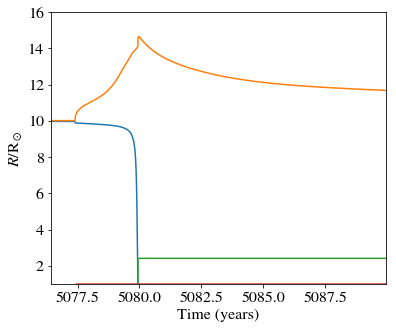

In [170]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.R_Engulfed_Planet
logdt=h.log_dt
star_radius=10**h.log_R

plt.plot(age,planet_location)
plt.plot(age,star_radius)
plt.plot(age,dest_f)
plt.plot(age,eng_f)
i_full_engulfment=np.where(eng_f < 1)[0][-1]
i_destruction=np.where(dest_f < 0.999)[0][-1]
print(age[i_full_engulfment]
     )

print(age[i_destruction]
     )


min_age = age[i_full_engulfment]
max_age = age[i_destruction]

plt.axis([min_age-1,max_age+10,1,16])

#i_full_engulfment=min(np.where(eng_f < 1))
#i_destruction=min(np.where(dest_f == 0))
#print(i_full_engulfment,i_destruction)
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
#plt.axis([t0+2750,t0+2790, 0, 8])
plt.xlabel(r'Time (years)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

1524


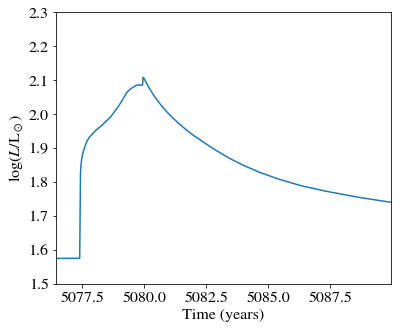

In [171]:
Rsun= 6.9598e10
#deltat = 

secyer=3600*24*365
#age=(h.star_age_sec)/secyer
age=(h.star_age)
#age=h.star_age_day
print(len(age))
t0=age[0]
plt.plot(age,logl)
plt.axis([min_age-1,max_age+10,1.5,2.3])
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
#plt.axis([t0+2750,t0+2790, 1, 2.1])
plt.xlabel(r'Time (years)')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')

3.1386187654e+46


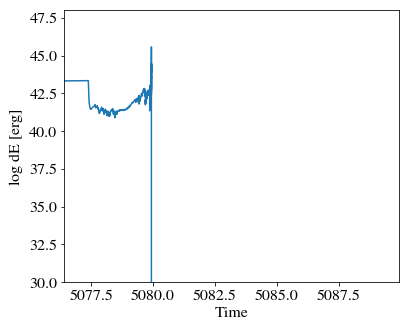

In [172]:
plt.plot(age,injected_e)
#plt.plot(age,star_radius)
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
#plt.axis([t0,t0+3200, 37, 45])
plt.axis([min_age-1,max_age+10,30,48])
plt.xlabel(r'Time')
plt.ylabel(r'$\log  $ dE [erg]')
dt=10**logdt
print(sum(10**injected_e))

In [173]:
# Number of orbits per timesep 
age=(h.star_age)#*365.0
r=h.R_Engulfed_Planet*c.rsun # cm
vv=h.Orbital_velocity*1e5 # cm/s
dt=(10**h.log_dt)*secyer # s
orbits_dt=(vv*dt)/(2*np.pi*r)
f=h.Log_Destruction_factor
area=h.Engulfed_fraction

# Find Grazing Phase
#print(np.where(f<0))
#print(np.where(area<1.0))

# Find Engulfment Phase
#print(np.where(area==1.0))

# End of Engulfment 

# Find dynamical engulfment phase
# End of phase (destruction)
i=0
while (f[i] <= 0.0):
    i=i+1
# Beginning of phase (end grazing)
j=0
while (area[j] < 1.0) and (j <= len(area)):
    j=j+1
    
print(i,j)




1402 27


10.2053902765 0.159417934399


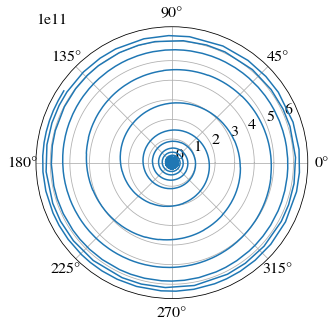

In [174]:
alpha=np.zeros(len(vv))
alpha[0]=0.0
i=1
while (i<len(vv)-1):
 dalpha = (vv[i]*dt[i])/(2*np.pi*r[i]) # dalpha = 1 if vdt = 2pir 
 alpha[i] = alpha[i-1]+dalpha 
 i = i+1  

ax = plt.subplot(111, projection='polar')
#ax.plot(alpha[j+12:i-25] , r[j+12:i-25])
ax.plot(alpha[j+194:i] , r[j+194:i])
ax.set_rscale('linear')
print(r[10]/Rsun,r[len(vv)-1]/Rsun)

In [175]:
h = mr.MesaData('./LOGS_RS10_MP0.01_RP0.1/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)




[5077.7460042932153, 5079.9462069652955]


./LOGS_RS10_MP0.01_RP0.1 ['./LOGS_RS10_MP0.01_RP0.1']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


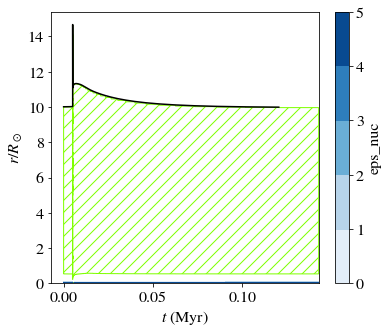

In [176]:
import mkipp
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["./"+LOGS],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius'))
FILENAME = "kipp_eng_m.pdf"
plt.savefig(FILENAME)    


[5077.7460042932153, 5079.9462069652955]
LOGS_RS10_MP0.01_RP0.1 ['LOGS_RS10_MP0.01_RP0.1']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


Kipp_Plot(contour_plot=<matplotlib.contour.QuadContourSet object at 0x11b209d30>, histories=[<mesa_data.mesa_data object at 0x119f1e4a8>], xlims=(1.0, 1524.0))

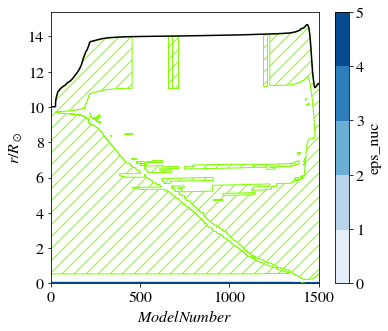

In [177]:
import mkipp
h = mr.MesaData(LOGS+'/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[LOGS],save_filename = "Kippenhahn_r.pdf",xaxis = "model_number",yaxis='radius'),xlims = [0,1500])


[5077.7460042932153, 5079.9462069652955]
LOGS_RS10_MP0.01_RP0.1 ['LOGS_RS10_MP0.01_RP0.1']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


Kipp_Plot(contour_plot=<matplotlib.contour.QuadContourSet object at 0x11b19b2b0>, histories=[<mesa_data.mesa_data object at 0x11b3c3438>], xlims=(1.5e-05, 0.007690326011039205))

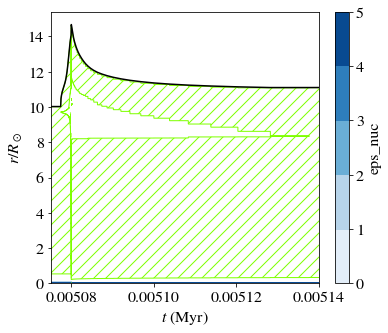

In [182]:
import mkipp
h = mr.MesaData(LOGS+'/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[LOGS],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius'),xlims = [0.005075,0.00514])
